# PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
x = digits.data
y = digits.target

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [5]:
x1 = X_std.T

In [6]:
cov_mat = np.cov(X_std.T)

In [7]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [8]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

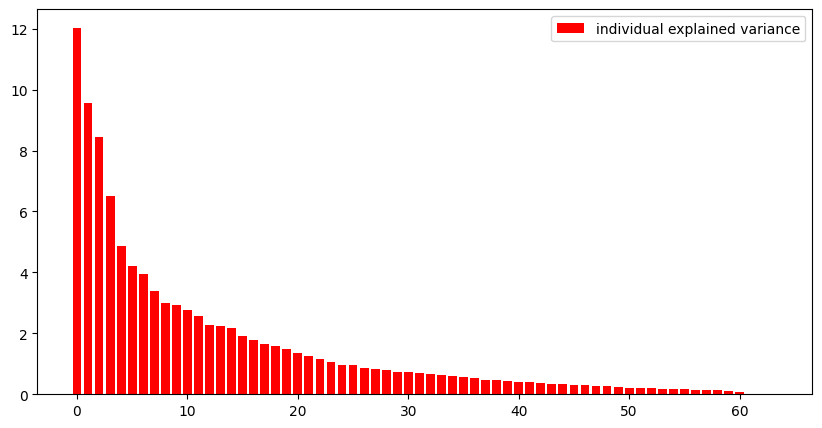

In [10]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'r')
plt.legend()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y, train_size=0.8)

In [13]:
from sklearn.decomposition import PCA 

In [14]:
pca = PCA(n_components = 10)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [15]:
pca_x_train.shape

(1437, 10)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
rf=DecisionTreeClassifier().fit(pca_x_train,y_train)
predicted=rf.predict(pca_x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted,y_test)

0.8166666666666667

# LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 9)
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test) 

In [20]:
X_train.shape

(1437, 9)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
y_pred1 = rf1.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred1)

0.9611111111111111